<div style="text-align:center;">

# <span style="font-size:40px; font-weight:700;">F-EGLA-Toolkit</span>

<span style="font-size:28px; font-weight:600;">Article:</span>

## <span style="font-size:34px; font-style:italic;">F-EGLA: A Python Toolkit for Rapid Estimation of Tsunami-Induced Flooded Areas</span>

### <span style="font-size:24px; font-weight:600;">Authors:</span>

<span style="font-size:20px;">
Francisco J. Sáez<sup>a</sup>,  
Rodrigo Cienfuegos<sup>b</sup>,  
Patricio A. Catalán<sup>c</sup>,  
Alejandro Urrutia<sup>a</sup>
</span>

### <span style="font-size:24px; font-weight:600;">Affiliations:</span>

<div style="font-size:16px; line-height:1.4;">
a. Centro de Investigación para la Gestión Integrada del Riesgo de Desastres (CIGIDEN), Santiago, Chile  
</div>
<div style="font-size:16px; line-height:1.4;">
b. Departamento de Ingeniería Hidráulica y Ambiental, Escuela de Ingeniería, Pontificia Universidad Católica de Chile, Santiago, Chile  
</div>
<div style="font-size:16px; line-height:1.4;">
c. Departamento de Obras Civiles, Universidad Técnica Federico Santa María, Valparaíso, Chile  
</div>

</div>

### <span style="font-size:20px; font-weight:600;">Corresponding Author:</span>

<div style="text-align:left; font-size:16px;">
Francisco J. Sáez — <a href="mailto:fjsaezr@gmail.com">fjsaezr@gmail.com</a><br>
ORCID: <a href="https://orcid.org/0000-0002-2529-8582">0000-0002-2529-8582</a><br>
LinkedIn: <a href="https://linkedin.com">https://www.linkedin.com/in/franciscosaezr/</a><br>
GitHub:<a href="https://github.com/">GitHub – FEGLA-Toolkit</a>
</div>

---

## **Overview**

This notebook implements the **Energy Grade Line Analysis (EGLA)** workflow for computing transect-based tsunami hydrodynamic profiles over a predefined flooded area. Using user-defined transects extracted from a KMZ or SHP inundation map and topobathymetric data, the notebook reconstructs physically consistent profiles of flow depth, velocity, and Froude number along each transect. The workflow is designed to be reproducible, and suitable for engineering interpretation and post-processing.

## **What EGLA Does**

The **Energy Grade Line Analysis (EGLA)** method reconstructs **one-dimensional hydrodynamic profiles** along user-defined transects over a flooded area.
Starting from a prescribed inundation limit, EGLA computes physically consistent distributions of **flow depth, flow velocity, and Froude number** along each transect using an energy-balance formulation with prescribed Froude evolution and terrain roughness.

EGLA is designed to translate mapped inundation extents into interpretable hydrodynamic quantities suitable for engineering analysis and post-event assessment.

ASCE standard: <a href="https://ascelibrary.org/doi/book/10.1061/9780784415788">Minimum Design Loads and Associated Criteria for Buildings and Other Structures</a>

## **What This Notebook Executes**

This notebook applies **EGLA** to a set of user-defined transects and performs the following steps:
- Runs **EGLA** along each transect to compute flow depth, velocity, and Froude number using prescribed parameters (F0, FR, Manning’s n).
- Integrates the energy grade line **from the runup point toward the shoreline**, accounting for terrain elevation and friction losses.
- Reports diagnostic hydrodynamic values at the shoreline for each transect.
- Generates **hydrodynamic profile plots** (flow depth, velocity, and Froude number) along cumulative distance.
- Saves the computed transect-by-transect results as CSV files for further analysis and reproducibility.

The notebook provides a practical and transparent workflow for evaluating tsunami-induced hydrodynamics along transects derived from flooded-area maps (KMZ or SHP).


In [1]:
# Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions for applying EGLA
from tsunamicore.postprocessing.nootebook_tools import (
    build_project_paths,
    load_transects,
    EGLA_run,
    plot_EGLA_transect_profile,
    EGLA_merge_variables, 
    save_EGLA_results_csv
)

from tsunamicore.utils.plot_style import apply_plot_style
apply_plot_style()

#### **Parameters dictionary (params)**

The params dictionary contains all configuration settings required to run the EGLA and obtain the hydrodynamic profile.
- **city** - Name of the study area.
- **manning** - Manning roughness coefficient used in flow dissipation along transects.
- **mode** - Selected Froude parameterization: constant, squared or linear (**FBCP**).
- **F0** - Calibrated base Froude parameter (shoreline Froude number).
- **FR** - Calibrated base Froude parameter (inland Froude number at the inundation limit, only for linear decay).

**Froude-Based Calibration Parameter (FBCP)**

The EGLA method allows three options for how the Froude number varies inland.  
These are implemented using the following mathematical expressions:

FBCP = 
\begin{cases}
F_i = F_0, & \text{(constant)} \\[10pt]
F_i = F_0 \left( 1 - \dfrac{x_i}{X_R} \right)^{1/2}, & \text{(square-root decay)} \\[12pt]
F_i = F_0 + (F_R - F_0)\dfrac{x_i}{X_R}, & \text{(linear decay)}
\end{cases}

**Where:**  
- \( F_0 \): shoreline Froude number  
- \( F_R \): inland Froude number at the inundation limit  
- \( x_i \): distance along the transect  
- \( X_R \): total inundation distance  

In [2]:
params = {
    'city'       : 'Arica',
    'manning'    : 0.04, 
    'mode'       : 'linear',
    'F0'         : 0.5,
    'FR'         : 0
}

In [3]:
# Dictionary to store all necessary path
paths        = build_project_paths(params["city"])

# Loading transect data
transectData = load_transects(paths["transect_path"], mode='EGLA')

print(f'Transects name: {list(transectData.keys())}')

Loading transects...
Loaded 4 transects.
Transects name: ['T001', 'T002', 'T003', 'T004']


In [4]:
# Running EGLA for params 
h_dict, v_dict, Fr_dict = EGLA_run(transectData, params['mode'], params['F0'], params['FR'], params['manning'])


 Running EGLA for transect = T001

 Shoreline values:
   h(0)  = 17.475 m
   u(0)  =  6.547 m/s
   Fr(0) =  0.500

 Running EGLA for transect = T002

 Shoreline values:
   h(0)  = 18.088 m
   u(0)  =  6.660 m/s
   Fr(0) =  0.500

 Running EGLA for transect = T003

 Shoreline values:
   h(0)  = 17.361 m
   u(0)  =  6.525 m/s
   Fr(0) =  0.500

 Running EGLA for transect = T004

 Shoreline values:
   h(0)  = 17.811 m
   u(0)  =  6.609 m/s
   Fr(0) =  0.500


Results have been saved!


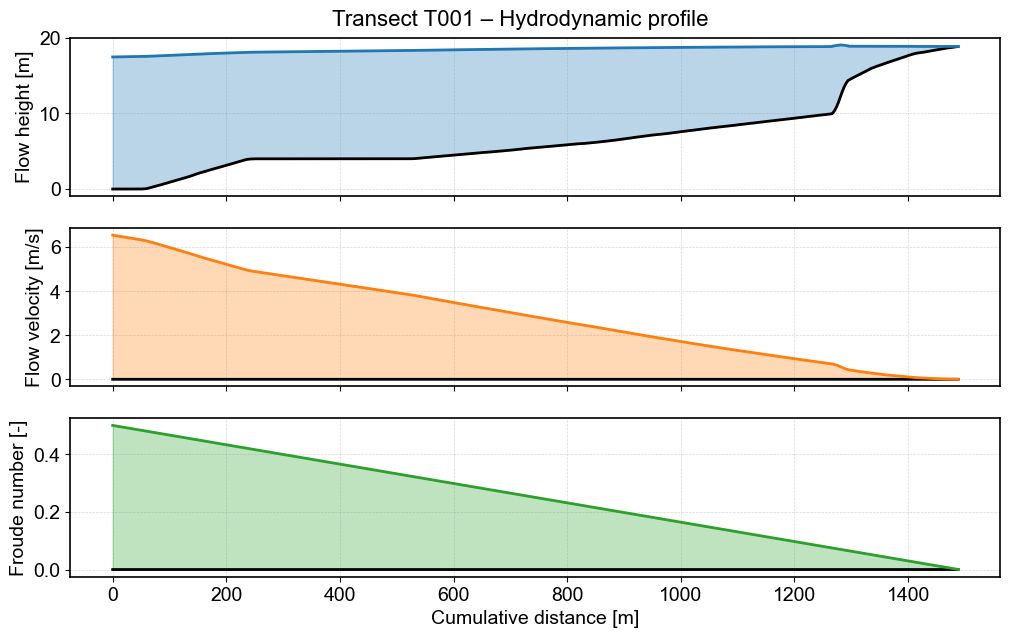

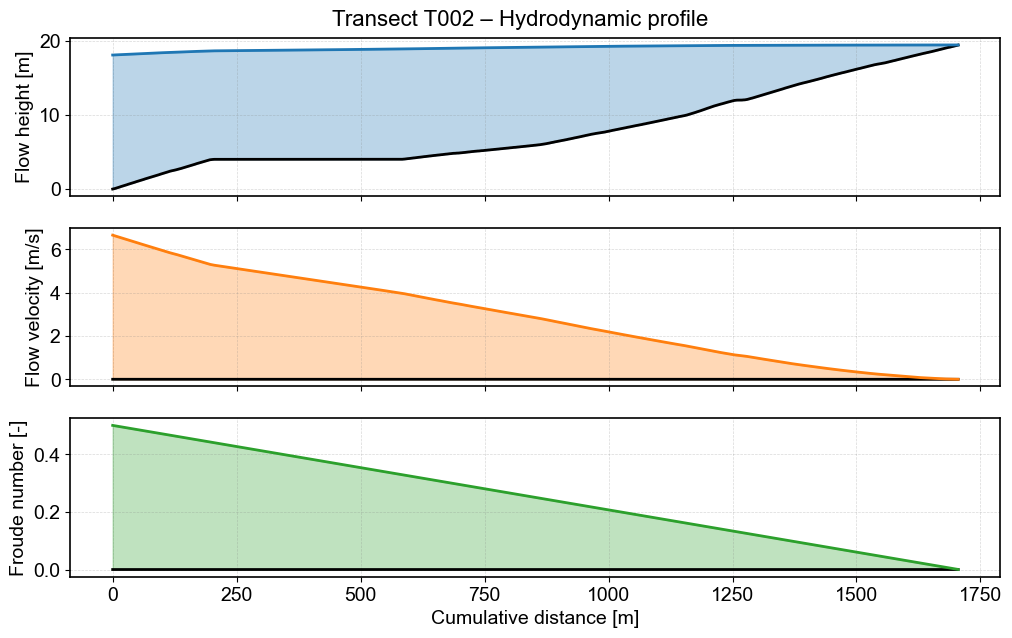

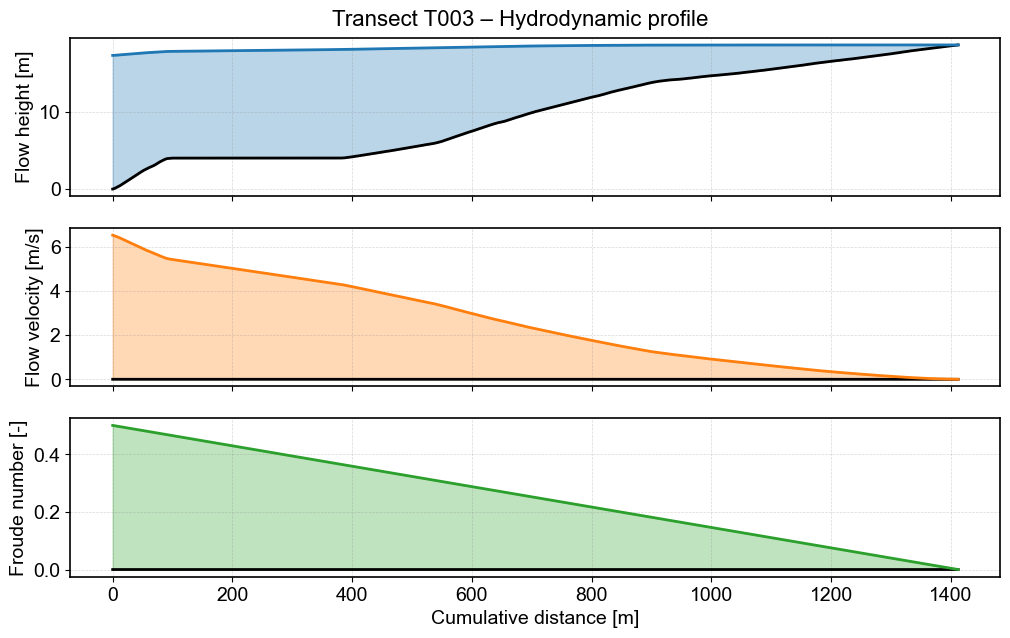

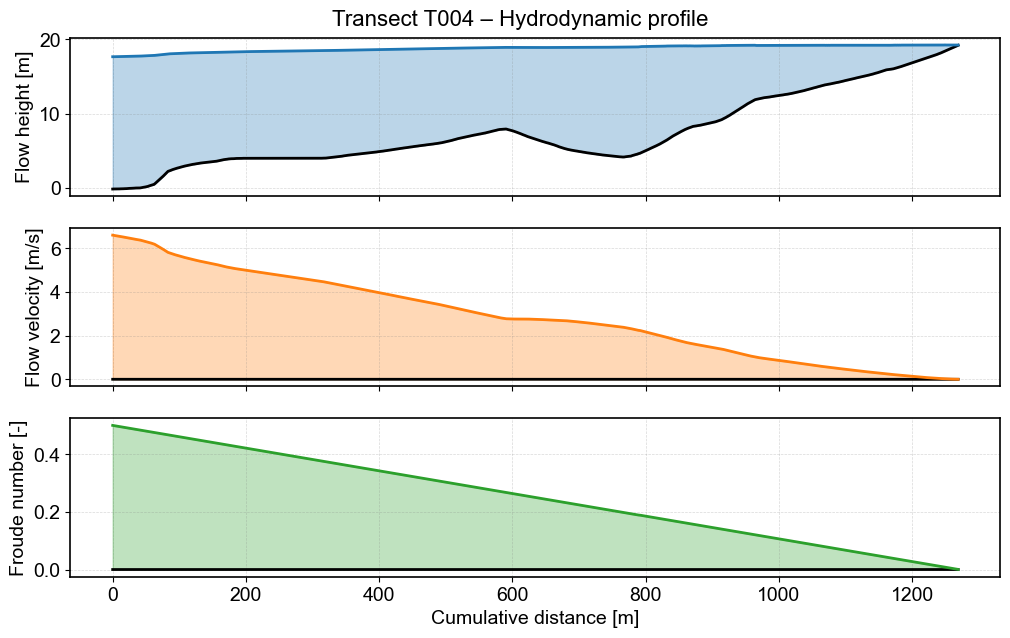

In [5]:
# Manage the results
transectData = EGLA_merge_variables(transectData, h_dict, v_dict, Fr_dict)
save_EGLA_results_csv(transectData, paths)

# Plotting results
for key, transect in transectData.items():
    plot_EGLA_transect_profile(transect, key, paths)